In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score, confusion_matrix

Mount and load the data into pandas dataframes

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
df=pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/Datasets/fashion-mnist_train.csv")

In [ ]:
dfTest=pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/Datasets/fashion-mnist_test.csv")

Dropping the border of each image to make the dataset more manageable

In [ ]:
# prompt: pixel1 through pixel784 are laid out in a 28x28 grid from left to right and top to bottom. drop all of the pixels that would be on an edge

# Assuming your DataFrame is named 'df' and 'dfTest'
def drop_edge_pixels(df):
  # Create a list of column names to drop (edge pixels)
  cols_to_drop = []
  # Adjust the loop to start from 1 to 28
  for i in range(1, 29):
    cols_to_drop.append('pixel' + str(i))  # First row
    cols_to_drop.append('pixel' + str(784 - i + 1))  # Last row
  for i in range(1, 27):
    cols_to_drop.append('pixel' + str(i * 28 + 1))  # First column, adjusted for 1-based indexing
    cols_to_drop.append('pixel' + str(i * 28 + 28))  # Last column

  # Drop the edge pixel columns
  df = df.drop(columns=cols_to_drop, errors='ignore')  # Handle potential KeyError
  return df

df = drop_edge_pixels(df)
dfTest = drop_edge_pixels(dfTest)

Binary Classification: Drop all rows where label != 0 or 1

In [ ]:
df = df[df.label.isin([0, 1])]
dfTest = dfTest[dfTest.label.isin([0, 1])]

In [ ]:
dfTest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 29.9 MB


In [ ]:
X_train = df.drop('label', axis=1)
y_train = df['label']
X_test = dfTest.drop('label', axis=1)
y_test = dfTest['label']

Visualize the data: show an image of each label

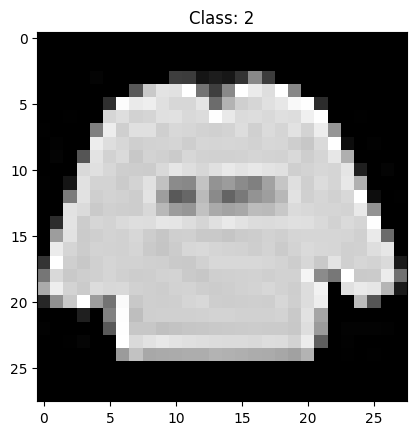

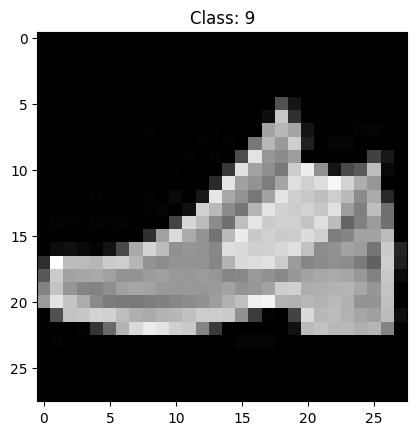

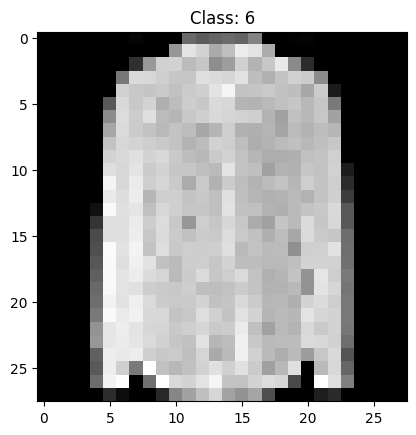

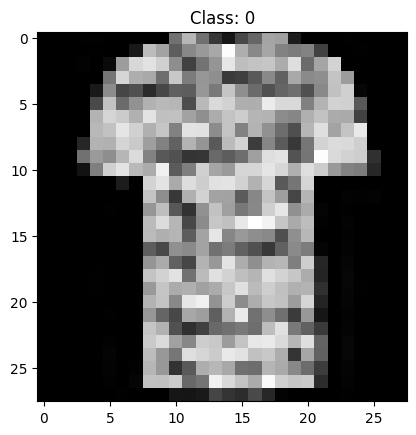

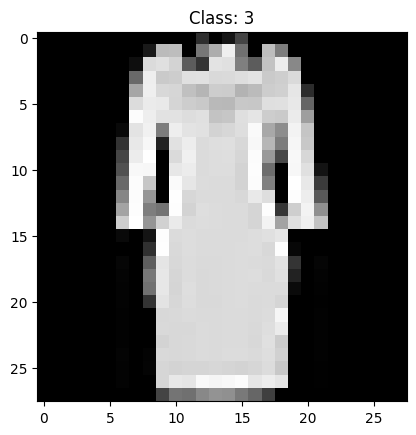

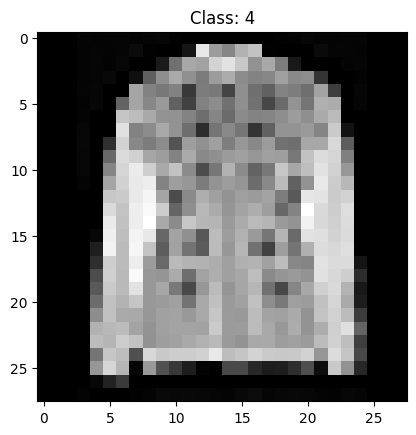

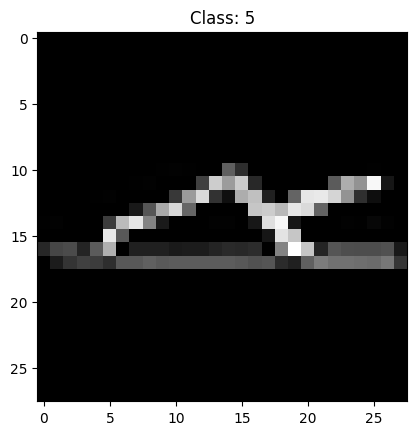

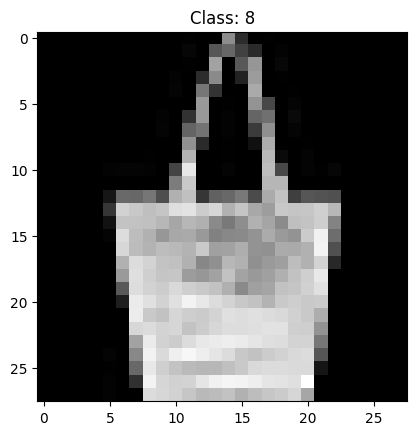

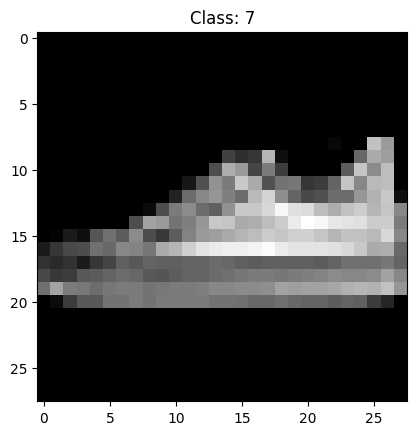

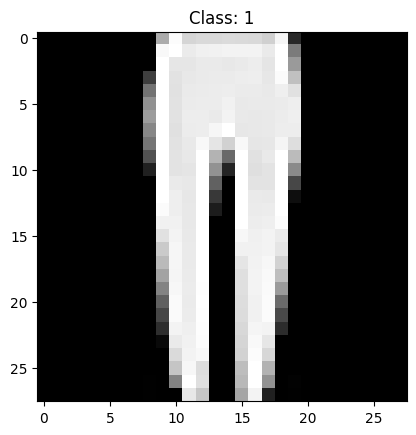

In [ ]:
# prompt: print an image of each class in df

# Assuming 'df' contains your data and 'label' is the column with class labels
for label in df['label'].unique():
  # Get a sample image for the current class
  sample_image = df[df['label'] == label].iloc[0, 1:]  # Assuming the first column is 'label'

  # Reshape the image data into a 28x28 array (adjust if your image size is different)
  image_array = np.array(sample_image).reshape(28, 28)  # Assuming 20x20 after dropping pixels

  # Display the image
  plt.imshow(image_array, cmap='gray')
  plt.title(f'Class: {label}')
  plt.show()

Scaling the data

In [ ]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(X_train)
X_scaled = scaler.transform(X_train)

logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(solver='newton-cg',max_iter=10000)
log_reg.fit(X_scaled, y_train)
y_pred = log_reg.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


Nearest Neighbor

In [ ]:
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=3, weights='uniform',  algorithm='ball_tree') #,
neigh.fit(X_scaled, y_train)
y_pred = neigh.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


Support Vector Machine

In [ ]:
from sklearn import svm

clf = svm.SVC(C=1.0, kernel='sigmoid')
clf.fit(X_scaled, y_train)
y_pred = clf.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


Decision Tree

In [ ]:
from sklearn import tree

clf = tree.DecisionTreeClassifier(criterion='entropy', splitter='best')
clf = clf.fit(X_scaled, y_train)
y_pred = clf.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


Accuracy scoring

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.1099

In [ ]:
from sklearn.metrics import precision_score
precision_score(y_test, y_pred)

0.9989847715736041

In [ ]:
from sklearn.metrics import recall_score
recall_score(y_test, y_pred)

0.984

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred)


0.9914357682619648

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred)

0.9915

In [ ]:
def colab2pdf():
  ENABLE=True # @param {type:"boolean"}
  if ENABLE:
    !apt-get install librsvg2-bin
    import os, datetime, json, locale, pathlib, urllib, requests, werkzeug, nbformat, google, yaml, warnings
    locale.setlocale(locale.LC_ALL, 'en_US.UTF-8')
    NAME = pathlib.Path(werkzeug.utils.secure_filename(urllib.parse.unquote(requests.get(f"http://{os.environ['COLAB_JUPYTER_IP']}:{os.environ['KMP_TARGET_PORT']}/api/sessions").json()[0]["name"])))
    TEMP = pathlib.Path("/content/pdfs") / f"{datetime.datetime.now().strftime('%Y%m%d_%H%M%S')}_{NAME.stem}"; TEMP.mkdir(parents=True, exist_ok=True)
    NB = [cell for cell in nbformat.reads(json.dumps(google.colab._message.blocking_request("get_ipynb", timeout_sec=600)["ipynb"]), as_version=4).cells if "--Colab2PDF" not in cell.source]
    warnings.filterwarnings('ignore', category=nbformat.validator.MissingIDFieldWarning)
    with (TEMP / f"{NAME.stem}.ipynb").open("w", encoding="utf-8") as nb_copy: nbformat.write(nbformat.v4.new_notebook(cells=NB or [nbformat.v4.new_code_cell("#")]), nb_copy)
    if not pathlib.Path("/usr/local/bin/quarto").exists():
      !wget -q "https://quarto.org/download/latest/quarto-linux-amd64.deb" -P {TEMP} && dpkg -i {TEMP}/quarto-linux-amd64.deb > /dev/null && quarto install tinytex --update-path --quiet
      with (TEMP / "config.yml").open("w", encoding="utf-8") as file: yaml.dump({'include-in-header': [{"text": r"\usepackage{fvextra}\DefineVerbatimEnvironment{Highlighting}{Verbatim}{breaksymbolleft={},showspaces=false,showtabs=false,breaklines,breakanywhere,commandchars=\\\{\}}"}],'include-before-body': [{"text": r"\DefineVerbatimEnvironment{verbatim}{Verbatim}{breaksymbolleft={},showspaces=false,showtabs=false,breaklines}"}]}, file)
      !quarto render {TEMP}/{NAME.stem}.ipynb --metadata-file={TEMP}/config.yml --to pdf -M latex-auto-install -M margin-top=1in -M margin-bottom=1in -M margin-left=1in -M margin-right=1in --quiet
      google.colab.files.download(str(TEMP / f"{NAME.stem}.pdf"))
colab2pdf()

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  librsvg2-bin
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 1,871 kB of archives.
After this operation, 6,019 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 librsvg2-bin amd64 2.52.5+dfsg-3ubuntu0.2 [1,871 kB]
Fetched 1,871 kB in 0s (4,286 kB/s)
Selecting previously unselected package librsvg2-bin.
(Reading database ... 123621 files and directories currently installed.)
Preparing to unpack .../librsvg2-bin_2.52.5+dfsg-3ubuntu0.2_amd64.deb ...
Unpacking librsvg2-bin (2.52.5+dfsg-3ubuntu0.2) ...
Setting up librsvg2-bin (2.52.5+dfsg-3ubuntu0.2) ...
Processing triggers for man-db (2.10.2-1) ...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>